<h1><center>ML PROJECT - MEDICAL INSURANCE COST PREDICTION </center>

### Importing the Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

### Data Collection & Analysis

In [13]:
insurance_dataset = pd.read_csv("C:\\Users\\Dell\\Desktop\\AIML\\insurance.csv")


In [14]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance_dataset.shape

(1338, 7)

In [16]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Data Preprocessing

Categorical Features:
- Sex
- Smoker
- Region

In [17]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Analysis

In [18]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


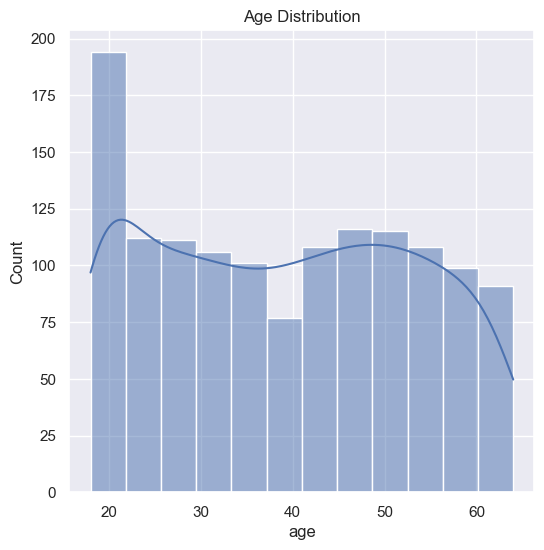

In [19]:
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'], kde=True)  # Replaces distplot
plt.title('Age Distribution')
plt.show()

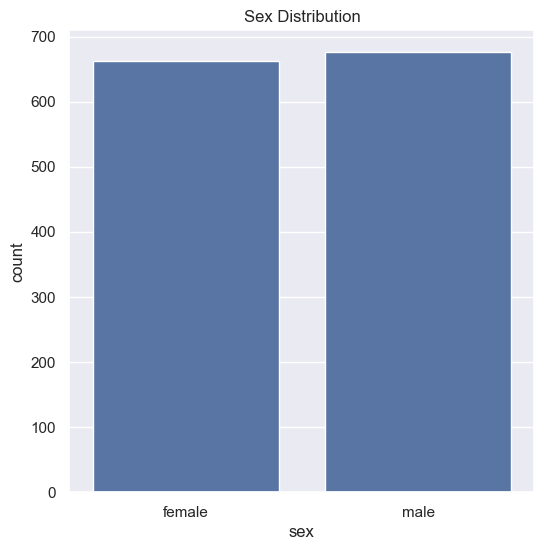

In [20]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [21]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

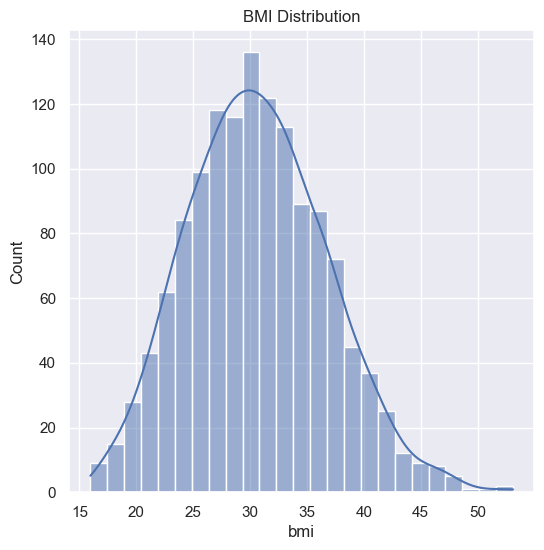

In [22]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'], kde=True)
plt.title('BMI Distribution')
plt.show()


Normal BMI Range --> 18.5 to 24.9

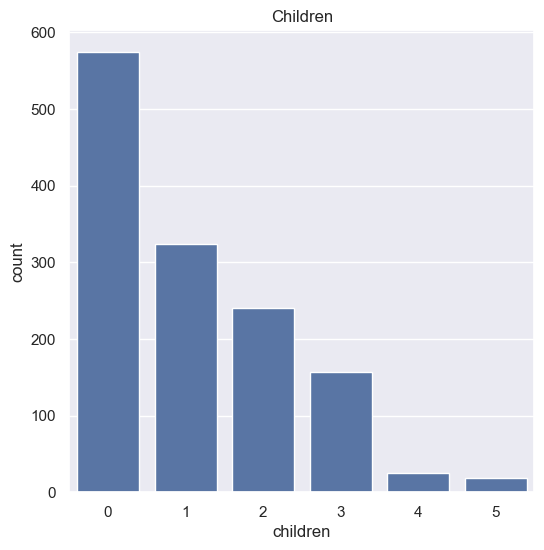

In [23]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [24]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

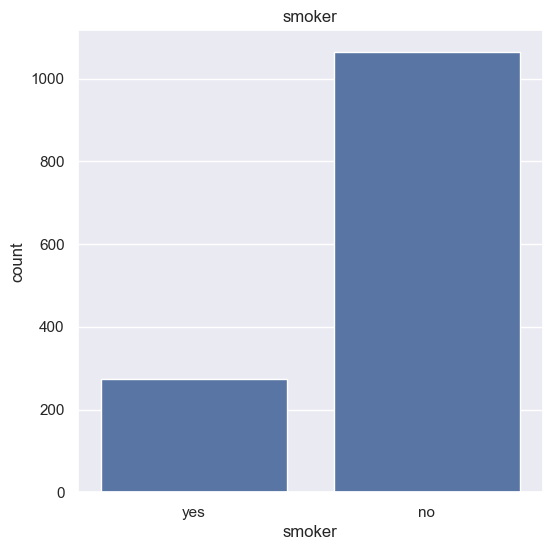

In [25]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [26]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

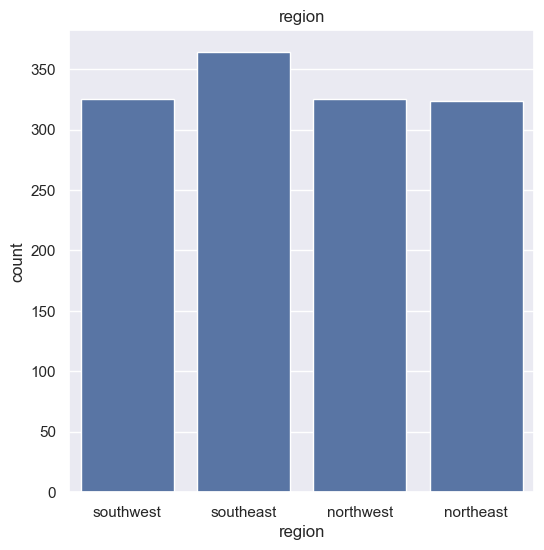

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [28]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

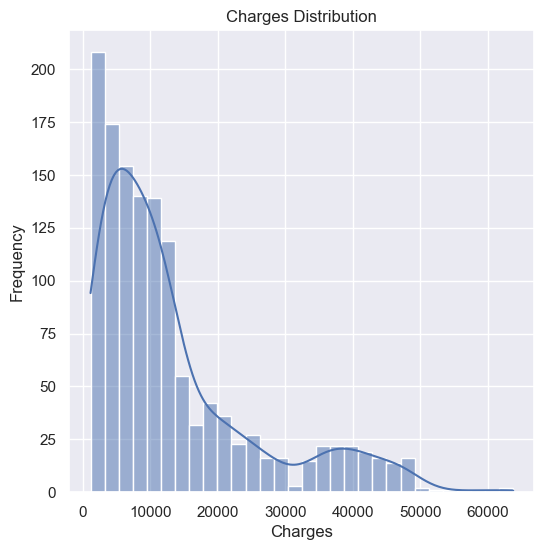

In [29]:
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'], kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')  # Optional: add x-axis label
plt.ylabel('Frequency')  # Optional: add y-axis label
plt.show()


### Encoding the categorical features

In [30]:
insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
insurance_dataset.replace({'region': {
    'southeast': 0,
    'southwest': 1,
    'northeast': 2,
    'northwest': 3
}}, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_1116\244369229.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1116\244369229.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1116\244369229.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. 

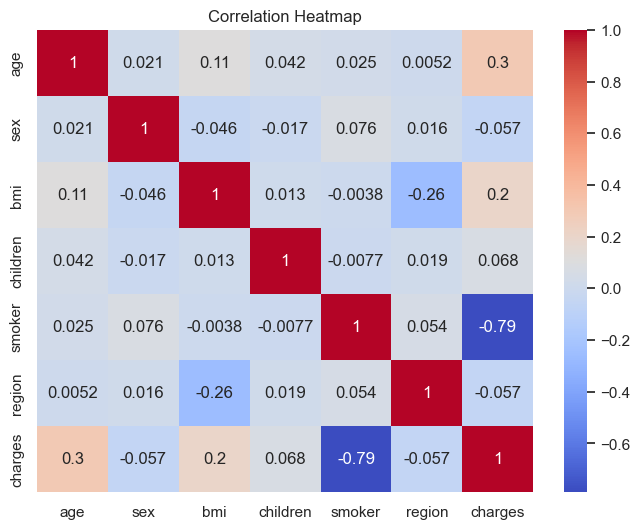

In [31]:
plt.figure(figsize=(8,6))
sns.heatmap(insurance_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Splitting the Data and Target

In [32]:
X = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [33]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [34]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


### Splitting the data into Training data & Testing Data

In [35]:
from sklearn.model_selection import train_test_split

# Features and target
X = insurance_dataset.drop('charges', axis=1)  # Features
y = insurance_dataset['charges']              # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

lr = LinearRegression()
lr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)


GradientBoostingRegressor()

In [38]:
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X_train.columns)
y_pred3 = gr.predict(X_test_df)

y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gr.predict(X_test)
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'rf':y_pred2,'gr':y_pred3})

In [39]:
df1

,Actual,Lr,rf,gr
764,9095.06825,8597.284895,11170.378751,10810.952230
887,5272.17580,7231.743882,5242.374700,5837.446283
890,29330.98315,37039.232090,28238.905291,27621.536382
1293,9301.89355,9616.212129,11729.422669,9924.440767
259,33750.29180,27161.155047,34536.243760,33517.594584
...,...,...,...,...
109,47055.53210,39017.518638,47307.952919,45901.005642
575,12222.89830,11922.482922,13060.672546,12306.163109
535,6067.12675,7316.166925,6179.437065,6577.338535
543,63770.42801,40853.403071,46824.542924,48308.211959


### Model Evaluation

In [40]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)

In [41]:
print(score1,score2,score3)

0.783021587162344 0.8630356089735728 0.8796063071366687


In [42]:
scores = [score1, score2, score3]
model = ['LR', 'RF', 'GB']
color = ['m', 'y', 'g']


## Performance Visualization

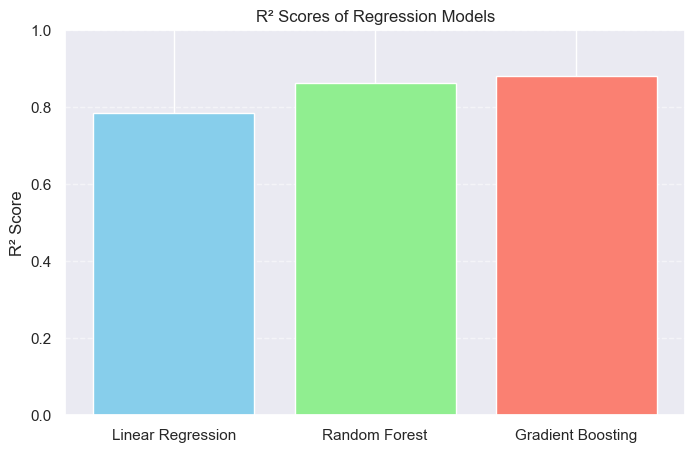

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on test set
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
gr_pred = gr.predict(X_test)

# Calculate R² scores
scores = [
    r2_score(y_test, lr_pred),
    r2_score(y_test, rf_pred),
    r2_score(y_test, gr_pred)
]

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
colors = ['skyblue', 'lightgreen', 'salmon']

# Plotting
plt.figure(figsize=(8,5))
plt.bar(models, scores, color=colors)
plt.title("R² Scores of Regression Models")
plt.ylabel("R² Score")
plt.ylim(0, 1)  # Optional: R² score ranges from -∞ to 1
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [44]:
from sklearn import metrics

# Get predictions from each model
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gr.predict(X_test)

# Calculate MAE
mae1 = metrics.mean_absolute_error(y_test, y_pred1)
mae2 = metrics.mean_absolute_error(y_test, y_pred2)
mae3 = metrics.mean_absolute_error(y_test, y_pred3)


In [45]:
print(f"Linear Regression MAE: {mae1}")
print(f"Random Forest MAE: {mae2}")
print(f"Gradient Boosting MAE: {mae3}")


Linear Regression MAE: 4190.220190137916
Random Forest MAE: 2567.414697015735
Gradient Boosting MAE: 2408.1511851364457


In [46]:
mae=[mae1,mae2,mae3]
model=['LR','RF','GB']
color=['m','y','g']

Text(0.5, 1.0, 'Mean Absolute error')

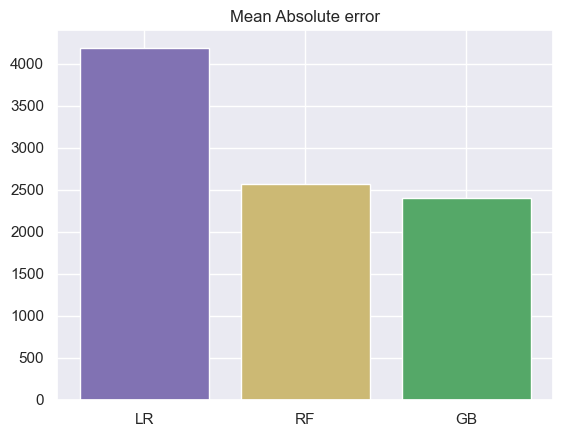

In [47]:
import matplotlib.pyplot as plt
plt.bar(model,mae,color=color)
plt.title("Mean Absolute error")

In [48]:
import numpy as np
mse1 = metrics.mean_squared_error(y_test,y_pred1)
rmse1 = np.sqrt(mse1)
mse2 = metrics.mean_squared_error(y_test,y_pred2)
rmse2 = np.sqrt(mse2)
mse3 = metrics.mean_squared_error(y_test,y_pred3)
rmse3 = np.sqrt(mse3)

In [49]:
print(mse1,mse2,mse3)
print(rmse1,rmse2,rmse3)

33685623.35414443 21263547.966396067 18690968.096642375
5803.931715151758 4611.241477779717 4323.305228253306


In [50]:
mse=[mse1,mse2,mse3]
rmse=[rmse1,rmse2,rmse3]
model=['LR','RF','GB']
color=['m','y','g']

Text(0.5, 1.0, 'Mean Square error')

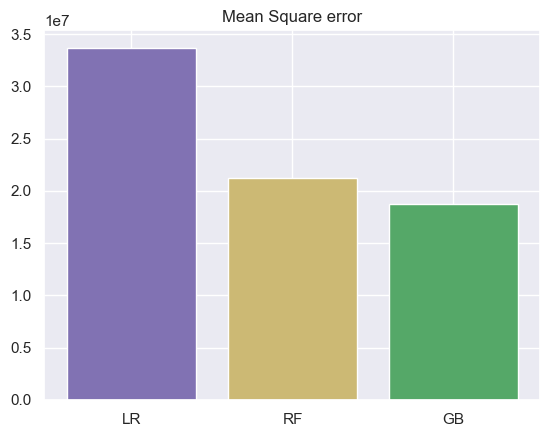

In [51]:
plt.bar(model,mse,color=color)
plt.title("Mean Square error")

Text(0.5, 1.0, 'Root Mean Square error')

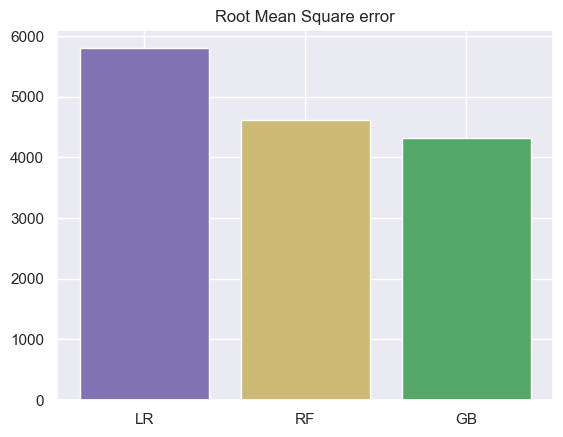

In [52]:
plt.bar(model,rmse,color=color)
plt.title("Root Mean Square error")

### Predicting Insurance cost for new person

In [53]:
# Input values: age, sex, bmi, children, smoker, region
person_info = (31, 1, 25.74, 0, 1, 0)
person_array = np.asarray(person_info)
person_array_reshaped = person_array.reshape(1, -1)
predicted_cost = gr.predict(person_array_reshaped)
print('The insurance cost is USD', predicted_cost[0])

The insurance cost is USD 4473.253084971098


c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## Saving Model using joblib

In [54]:
import joblib

In [55]:
joblib.dump(gr,'Insurance_cost_predictor')

['Insurance_cost_predictor']

In [56]:
model = joblib.load('Insurance_cost_predictor')

In [57]:
model.predict([[50,1,30.3,4,1,2]])

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([13040.5889547])

## GUI

In [58]:
from tkinter import *

In [59]:
import joblib

In [62]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Function to make prediction
def predict_insurance_cost():
    try:
        age = float(age_entry.get())
        gender = float(gender_entry.get())   
        bmi = float(bmi_entry.get())
        children = float(children_entry.get())
        smoker = float(smoker_entry.get())    
        region = float(region_entry.get())  
        input_data = np.array([[age, gender, bmi, children, smoker, region]])
        model = joblib.load("Insurance_cost_predictor")
        prediction = model.predict(input_data)
        result_label.config(text=f"Predicted Insurance Cost: USD {round(prediction[0], 2)}")
    except:
        messagebox.showerror("Input Error", "Please enter valid numerical values.")

root = tk.Tk()
root.title("Insurance Cost Estimator")
root.geometry("350x350")

tk.Label(root, text="Insurance Cost Estimator", font=("Arial", 14), bg="blue", fg="white").pack(fill=tk.X, pady=10)

input_frame = tk.Frame(root)
input_frame.pack(pady=10)

tk.Label(input_frame, text="Age:").grid(row=0, column=0, sticky="e")
tk.Label(input_frame, text="Gender (1=Male, 0=Female):").grid(row=1, column=0, sticky="e")
tk.Label(input_frame, text="BMI:").grid(row=2, column=0, sticky="e")
tk.Label(input_frame, text="Children:").grid(row=3, column=0, sticky="e")
tk.Label(input_frame, text="Smoker (1=Yes, 0=No):").grid(row=4, column=0, sticky="e")
tk.Label(input_frame, text="Region (1 to 4):").grid(row=5, column=0, sticky="e")

age_entry = tk.Entry(input_frame)
gender_entry = tk.Entry(input_frame)
bmi_entry = tk.Entry(input_frame)
children_entry = tk.Entry(input_frame)
smoker_entry = tk.Entry(input_frame)
region_entry = tk.Entry(input_frame)

age_entry.grid(row=0, column=1)
gender_entry.grid(row=1, column=1)
bmi_entry.grid(row=2, column=1)
children_entry.grid(row=3, column=1)
smoker_entry.grid(row=4, column=1)
region_entry.grid(row=5, column=1)

tk.Button(root, text="Predict Cost", command=predict_insurance_cost).pack(pady=10)

result_label = tk.Label(root, text="", font=("Arial", 12), fg="green")
result_label.pack()

2
root.mainloop()

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
